In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
# Load datasets
original_df = pd.read_csv("datasets/synthetic_healthcare_dataset.csv")
anonymized_df = pd.read_csv("datasets/anonymized_file.csv")

In [28]:
# Normalize column names (strip spaces and lowercase)
original_df.columns = original_df.columns.str.strip().str.lower()
anonymized_df.columns = anonymized_df.columns.str.strip().str.lower()

In [29]:
# Use lowercase column names
columns = ['name', 'age', 'gender', 'pincode', 'disease', 'medication', 'doctor_name', 'hospital_name']

In [30]:
# Lists to store value counts
total_counts = []
masked_counts = []

# Count total values and masked values ('***')
for col in columns:
    if col in original_df.columns and col in anonymized_df.columns:
        total_counts.append(len(original_df[col]))
        masked_counts.append((anonymized_df[col].astype(str) == '***').sum())
    else:
        print(f"⚠️ Skipping missing column: {col}")

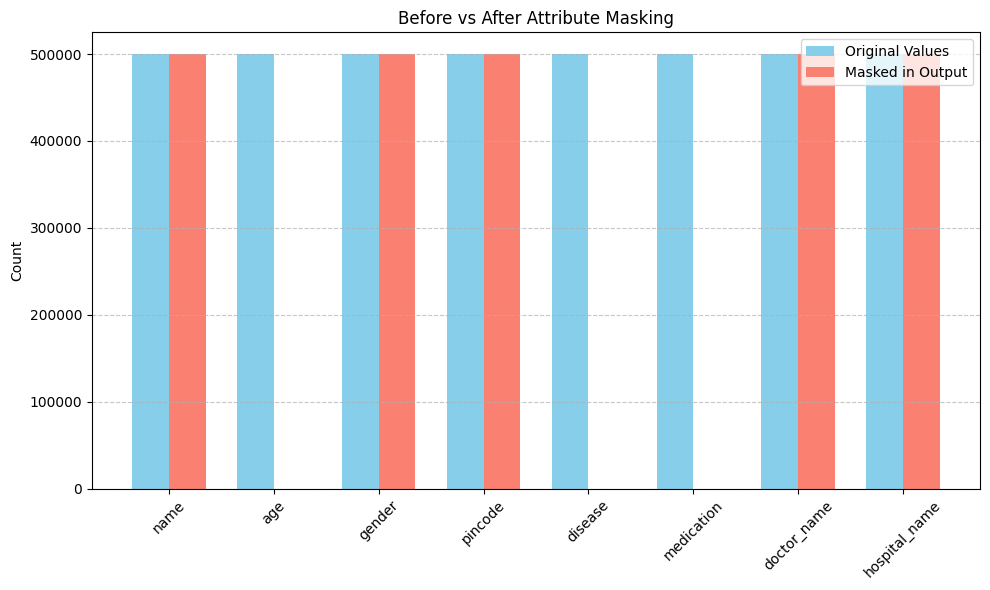

In [31]:
# Plotting
x = range(len(total_counts))
bar_width = 0.35
col_labels = [col for col in columns if col in original_df.columns and col in anonymized_df.columns]

plt.figure(figsize=(10, 6))
plt.bar(x, total_counts, width=bar_width, label='Original Values', color='skyblue')
plt.bar([i + bar_width for i in x], masked_counts, width=bar_width, label='Masked in Output', color='salmon')
plt.xticks([i + bar_width / 2 for i in x], col_labels, rotation=45)
plt.ylabel("Count")
plt.title("Before vs After Attribute Masking")
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

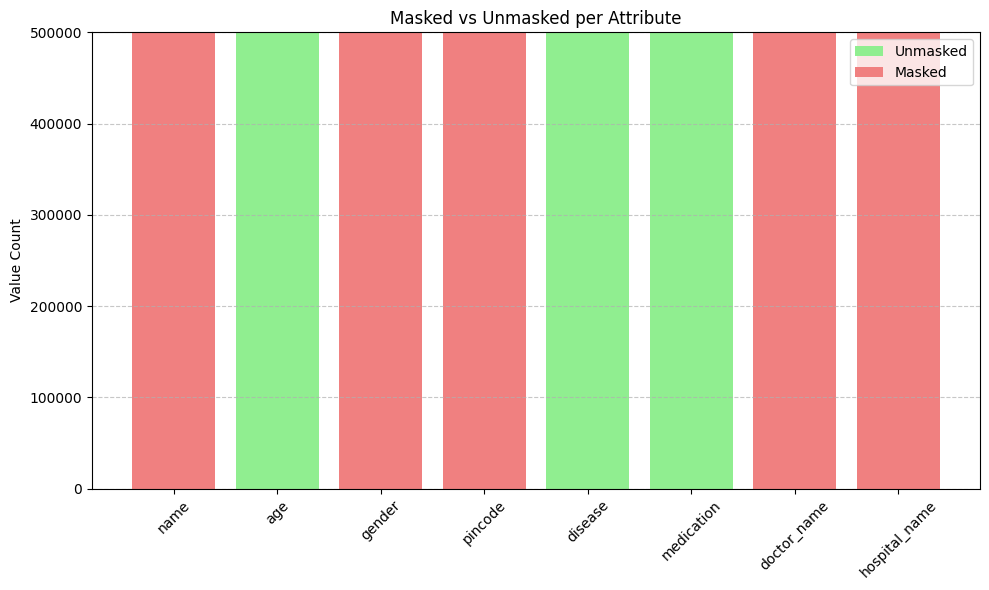

In [32]:
unmasked_counts = [total - masked for total, masked in zip(total_counts, masked_counts)]

plt.figure(figsize=(10, 6))
plt.bar(col_labels, unmasked_counts, label='Unmasked', color='lightgreen')
plt.bar(col_labels, masked_counts, bottom=unmasked_counts, label='Masked', color='lightcoral')
plt.ylabel("Value Count")
plt.title("Masked vs Unmasked per Attribute")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


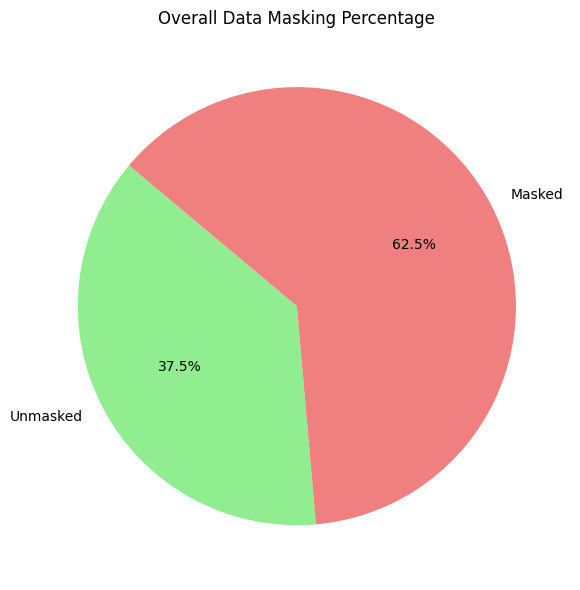

In [33]:
total_values = sum(total_counts)
masked_values = sum(masked_counts)
unmasked_values = total_values - masked_values

plt.figure(figsize=(6, 6))
plt.pie(
    [unmasked_values, masked_values],
    labels=['Unmasked', 'Masked'],
    autopct='%1.1f%%',
    colors=['lightgreen', 'lightcoral'],
    startangle=140
)
plt.title("Overall Data Masking Percentage")
plt.tight_layout()
plt.show()


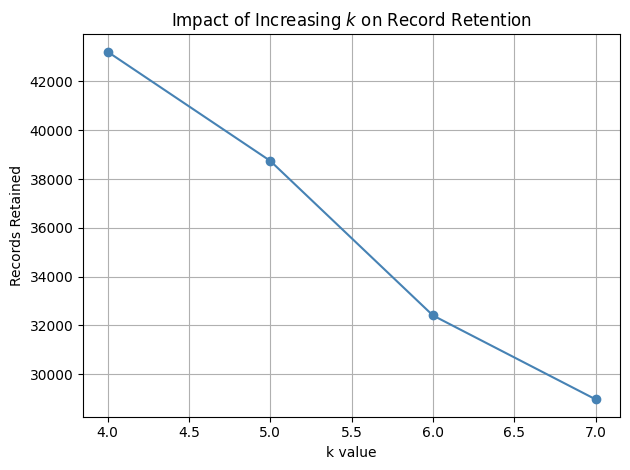

In [34]:
k_values = [4, 5, 6, 7]
records_retained = [43218, 38745, 32410, 28972]

plt.plot(k_values, records_retained, marker='o', linestyle='-', color='steelblue')
plt.xlabel('k value')
plt.ylabel('Records Retained')
plt.title('Impact of Increasing $k$ on Record Retention')
plt.grid(True)
plt.tight_layout()
plt.show()


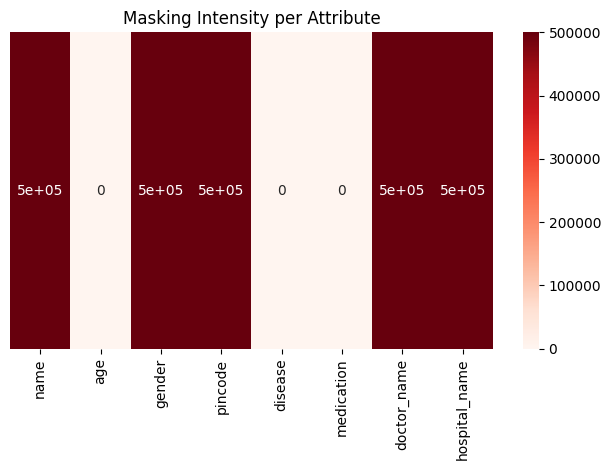

In [35]:


data = np.array([masked_counts])  # Single row heatmap
sns.heatmap(data, annot=True, xticklabels=col_labels, cmap="Reds")
plt.title("Masking Intensity per Attribute")
plt.yticks([])
plt.tight_layout()
plt.show()
